In [27]:
%load_ext autoreload
%autoreload 2
from IPython.display import display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import logging
logging.basicConfig(
    format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO, force=True
)

In [29]:
model_name = "bert-base-uncased"
from transformers import BertModel, BertTokenizer
model = BertModel.from_pretrained(model_name,
           output_hidden_states = True)
tokenizer = BertTokenizer.from_pretrained(model_name)

In [30]:
import evaluators, utils
ev = evaluators.TransformersEvaluator(model=model,
                                      tokenizer=tokenizer,
                                      model_name=model_name,
                                      all_layers=True)
ev.load_dataset("../datasets/dataset_1.json")

In [31]:
ev.reset_evaluator()
evaluation = ev.evaluate()

In [32]:
evaluation

,Case ID,Keyword,Word,Classification,Similarity,Lost,OOV
0,1,animal,"(fauna, 0)",0,0.277056,False,False
1,1,animal,"(africa, 0)",0,0.215356,False,False
2,1,animal,"(broader, 0)",0,0.137312,False,False
3,1,animal,"(sense, 0)",0,0.102416,False,False
4,1,animal,"(animals, 0)",1,0.400552,False,False
...,...,...,...,...,...,...,...
1522,4,resource,"(economic, 0)",0,0.248162,False,False
1523,4,resource,"(benefits, 0)",0,0.232086,False,False
1524,4,resource,"(side, 0)",0,0.125591,False,False
1525,4,resource,"(things, 0)",0,0.239410,False,False


'OOV:'

,Case ID,Keyword,Word,Classification,Similarity,Lost,OOV


'Lost:'

,Case ID,Keyword,Word,Classification,Similarity,Lost,OOV
1189,4,disease,"(anti-cancer, 0)",1,NaN,True,False
1458,4,when,"(now, 0)",1,NaN,True,False
1459,4,when,"(now, 1)",1,NaN,True,False


'Statistics:'

,Threshold,Precision,Recall,F1 Score,Accuracy,AUC-PR
Methods,,,,,,
bert-base-uncased-cos,0.257469,0.324074,0.411765,0.362694,0.91945,0.314859


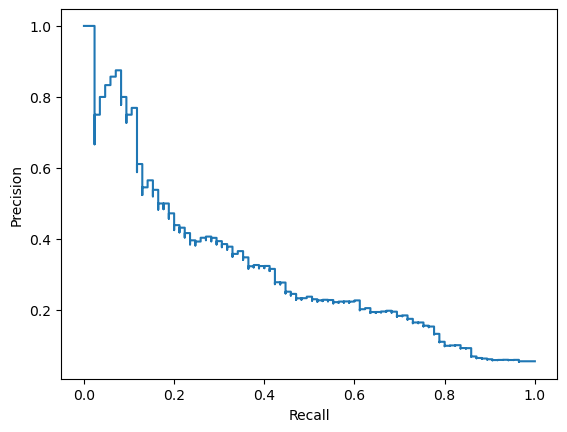

In [33]:
st = utils.Statistics(ev)

display("OOV:")
display(st.get_oov())

display("Lost:")
display(st.get_lost())

stats = st.calculate_statistics()
display("Statistics:")
display(stats)

st.display_PRC()

,Threshold,Precision,Recall,F1 Score,Accuracy,AUC-PR
Methods,,,,,,
bert-base-uncased-cos,0.257469,0.324074,0.411765,0.362694,0.919450,0.314859
bert-base-uncased-dot,58.885597,0.452381,0.447059,0.449704,0.939096,0.417696
bert-base-uncased-euc,6.883783,0.162162,0.211765,0.183673,0.895219,0.107161


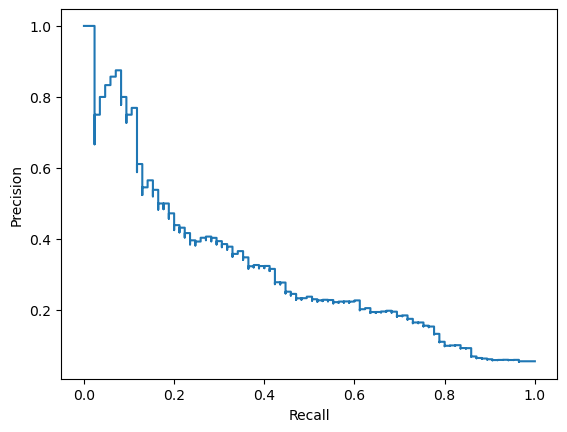

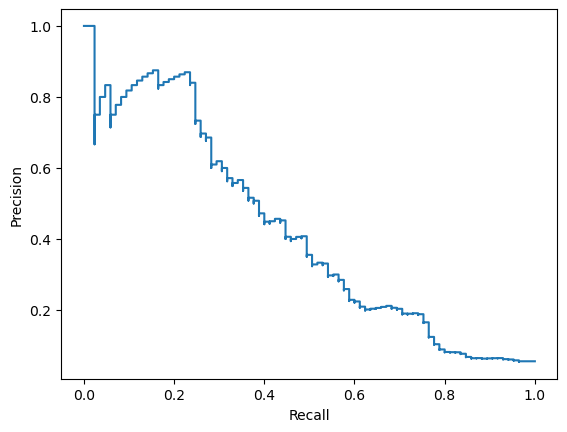

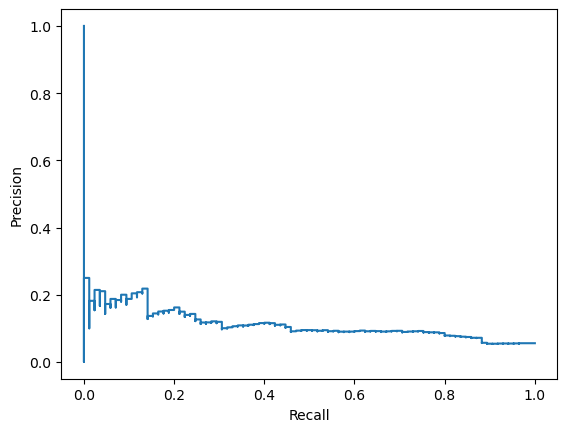

In [34]:
import pandas as pd
methods = [member for member in utils.SimilarityFunction]

results = pd.DataFrame()

for method in methods:
    ev.similarity_method = method
    ev.reset_evaluator()
    data = ev.evaluate()
    st = utils.Statistics(ev)
    stats = st.calculate_statistics()
    st.display_PRC()
    results = pd.concat([results, stats])

display(results)